## **Mount implementation folder in google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/MyDrive/FYP/Implementation/data
encoded-data.csv	preprosessing-dos.csv	  UNSW-NB15_1.csv
NUSW-NB15_features.csv	selected_columns_all.csv  UNSW-NB15_2.csv
OTset.csv		SVR-predict-data.csv	  UNSW-NB15_3.csv
preprocessing.csv	testset.csv		  UNSW-NB15_4.csv


In [3]:
attack_type = 'Analysis'

## **Load balanced training datset for DOS attacks**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from sklearn.utils import resample

#get select columns for training
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)
columns=list(select_col[attack_type])


#create training dataset down sampling
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']


DoS_attacks = df[df[attack_type] == 1]
# print(DoS_attacks.shape)
Normal_Data = df[df['Label'] == 0].sample(n=100000)
print(Normal_Data.shape)

frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=attack_labels, axis=1)
Y=result[[attack_type]]
X.head()
x_train,y_train  = shuffle(X[columns],Y)
X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 




(100000, 46)


array([[3.84484533e-06, 2.36605866e-06, 1.12387786e-05, ...,
        5.91514666e-07, 8.87271999e-07, 9.85857776e-08],
       [3.34360392e-03, 2.05760241e-03, 9.77361146e-03, ...,
        1.71466868e-04, 8.57334338e-05, 8.57334338e-05],
       [2.07201622e-04, 1.13467555e-04, 5.62404403e-04, ...,
        3.94669757e-05, 1.03600811e-04, 1.48001159e-05],
       ...,
       [3.93443922e-05, 8.85248823e-06, 1.12131518e-04, ...,
        3.93443922e-06, 4.91804902e-06, 9.83609804e-07],
       [9.39335372e-05, 5.97758873e-05, 3.24497674e-04, ...,
        5.69294165e-06, 8.53941247e-06, 2.84647082e-06],
       [1.69531658e-05, 1.20456705e-05, 5.08594975e-05, ...,
        1.78454377e-06, 1.33840783e-06, 4.46135943e-07]])

In [5]:
anomaly_rate = len(DoS_attacks)/len(result)

"Anomaly Rate is:"+"{:.1%}".format(anomaly_rate)

'Anomaly Rate is:1.6%'

## **Create Test Set for DOS attacks**

Data = (x_test_DOS_normalized, y_test)

In [6]:
import pandas as pd
import numpy as np
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)

columns=list(select_col[attack_type])

test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']
attack_categories = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] 


for i in attack_categories:
  test_data[i] = test_data['attack_cat'].apply(lambda x: 1 if x == i else 0)

x_test=test_data[columns]
y_test= test_data[[attack_type,'Label']]

print(y_test)
x_test = x_test.replace('-','')
x_test = x_test.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in x_test.columns.values.tolist():
  i = x_test.loc[x_test[i].isnull()].index
  x_test = x_test.drop(index=list(i))
  y_test = y_test.drop(index=list(i))

percent_missing = x_test.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': x_test.columns, 'count_missing': percent_missing, 'To be dropped': (percent_missing > 45)})
# print(missing_value_df)

x_test.head()
#encode the data
from sklearn.preprocessing import LabelEncoder

# replace hex with int
if 'sport' in x_test:
    x_test['sport'] = x_test['sport'].astype(str).apply(int, base=16)
if 'dsport' in x_test:
    x_test['dsport'] = x_test['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# # encode columns consists with strings
if 'srcip' in x_test:
    x_test['srcip'] = labelencoder.fit_transform(x_test['srcip'])
if 'dstip' in x_test:
    x_test['dstip'] = labelencoder.fit_transform(x_test['dstip'])
if 'proto' in x_test:
    x_test['proto'] = labelencoder.fit_transform(x_test['proto'])
if 'state' in x_test:
    x_test['state'] = labelencoder.fit_transform(x_test['state'])

df = pd.concat([x_test, y_test], axis=1)

DoS_attacks = df[df[attack_type] == 1]
print(DoS_attacks.shape)
Normal_Data = df[df['Label'] == 0]
print(Normal_Data.shape)

frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
print(result.shape)
X=result.drop(labels=[attack_type,'Label'], axis=1)
Y=result[[attack_type]]
X.head()
x_test,y_test  = shuffle(X[columns],Y)

X_test_DoS_normalized = preprocessing.normalize(x_test) 
X_test_DoS_normalized.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


        Analysis  Label
0              0      0
1              0      0
2              0      0
3              0      0
4              0      0
...          ...    ...
508005         0      0
508006         0      0
508007         0      0
508008         0      0
508009         0      0

[508010 rows x 2 columns]
(511, 17)
(443644, 17)
(444155, 17)


(444155, 15)

In [7]:
anomaly_rate = len(DoS_attacks)/len(result)

"Anomaly Rate is:"+"{:.1%}".format(anomaly_rate)

'Anomaly Rate is:0.1%'

##**Isolation Forest**

In [8]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

#training data
x = X_train_DoS_normalized
x_test=X_test_DoS_normalized


# Number of trees in random forest
n_estimators = [2, 4, 8, 16, 32, 64, 100]
# Number of features to consider at every split
max_features = [0.5 ,  0.7, 0.8 , 1.0, 2.0, 3.0]
# Maximum number of levels in tree
bootstrap = [True, False]
contamination=['auto','legacy']

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'contamination':contamination,
               'bootstrap': bootstrap}


def scorer_f(estimator, X):   #your own scorer
      return np.mean(estimator.score_samples(X))


 # create regressor object
regressor = GridSearchCV(IsolationForest(random_state=0),param_grid,scoring=scorer_f, return_train_score=False)

# fit the regressor with x and y data
regressor.fit(x)


df = pd.DataFrame(regressor.cv_results_)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
560 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 678, in _fit_and_score
    estimator.fit(X_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_iforest.py", line 307, in fit
    super()._fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py", line 342, in _fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

In [9]:
print(regressor.best_params_)

{'bootstrap': False, 'contamination': 'auto', 'max_features': 1.0, 'n_estimators': 32}


In [10]:
 # create regressor object
regressor = IsolationForest(bootstrap= False, contamination= 'auto', max_features= 1.0, n_estimators= 32)

# fit the regressor with x and y data
regressor.fit(x)

IsolationForest(n_estimators=32)

In [24]:
scores = []
anomaly_score = []

scores = regressor.decision_function(x_test)

predict = regressor.predict(x_test)
anomaly_score = np.array([1 if i < -1 else 0 for i in predict])

print(y_test)
# print(scores.shape)
print(anomaly_score)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[0 0 0 ... 0 0 0]


In [25]:
y_test = np.array(y_test)

In [26]:
totalRows = y_test.shape[0]
correctRows = 0
for i in range(totalRows):
  if anomaly_score[i] == y_test[i]:
      correctRows += 1

accuracy = 100*correctRows/(totalRows)
print("Accuracy of the model:"+ str(accuracy)+'%')

Accuracy of the model:99.88495007373552%


**Predict on test set**

In [27]:
predict=regressor.predict(x_test)
score = regressor.score_samples(x)
score

score_test = regressor.score_samples(x_test)

##**Customized threshold**

In [28]:
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 100)
print(f'The customized score threshold for 100% of outliers is {score_threshold:.4f}')# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score_test]

The customized score threshold for 100% of outliers is -0.3115


##**Test Set Accuracy**

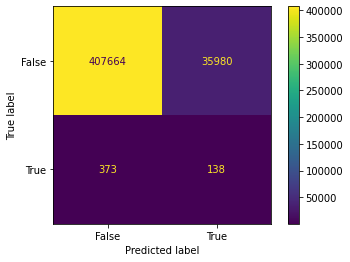

In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt

predict= [1 if i==-1 else 0 for i in predict]
confusion_matrix = metrics.confusion_matrix(y_test, predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 